# Configuración del ambiente

In [1]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


In [2]:
# Importar la biblioteca Pandas bajo el alias pd
import pandas as pd
# Importar la biblioteca NumPy bajo el alias np
import numpy as np
# Desactivar las advertencias relacionadas con asignaciones encadenadas en Pandas.
# Ej de warning: df[df['columna'] > 0]['otra_columna'] = 1    Primero se filtra y después se asigna
# Este tipo de asignación encadenada puede dar errores
pd.options.mode.chained_assignment = None
# Importar el módulo requests, que permite enviar solicitudes HTTP en Python
import requests
# Importar la clase StringIO desde el módulo io
from io import StringIO
# Importar las bibliotecas necesarias de Matplotlib para trazar y formatear gráficos
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
# Importar la clase RandomForestRegressor desde el módulo ensemble de la biblioteca scikit-learn
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns  # Importar seaborn para acceder a las paletas de colores
import matplotlib.patches as patches

In [3]:
# Leer el archivo CSV desde la URL proporcionada y almacenar los datos en un DataFrame utilizando Pandas
# Envía solicitud, se accede al atributo text para leer el contenido como una cadena de texto.  La clase StrinIO crea objeto en memoria
# que puede ser tratado como un texto y pd.read_csv carga los datos y los convierte en un dataframe
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))

# Leer el archivo Excel desde la URL proporcionada y almacenar los datos en un DataFrame utilizando Pandas
# Se omite la fila de encabezados iniciales (skiprows=16) y se selecciona la primera hoja de cálculo (sheet_name=0)
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)

# Filtrar el DataFrame para seleccionar solo los datos correspondientes a los codigos de area
df_population = df_population[df_population['Year'] == 2019]
df_areas = pd.read_csv('https://ceibe.eu/bootcamp/codigos_de_areas.csv')


In [4]:
df_areas.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,Mundo,2.0,África,15.0,África septentrional,NaN,NaN,Argelia,12,DZ,DZA,NaN,NaN,NaN
1,1,Mundo,2.0,África,15.0,África septentrional,NaN,NaN,Egipto,818,EG,EGY,NaN,NaN,NaN
2,1,Mundo,2.0,África,15.0,África septentrional,NaN,NaN,Libia,434,LY,LBY,NaN,NaN,NaN
3,1,Mundo,2.0,África,15.0,África septentrional,NaN,NaN,Marruecos,504,MA,MAR,NaN,NaN,NaN
4,1,Mundo,2.0,África,15.0,África septentrional,NaN,NaN,Sudán,729,SD,SDN,x,NaN,NaN


In [5]:
df_covid.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [6]:
df_population.head(3)

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
69,70,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,209.694,146.21,71.916,87.268,55.799,138.207,168.929,106.291,0,0
142,143,Estimates,Sub-Saharan Africa,b,1834,NaN,NaN,202.0,SDG region,1828,...,388.622,324.278,173.83,192.276,155.259,284.876,316.977,253.162,-484.702,-0.448
214,215,Estimates,Northern Africa and Western Asia,NaN,1833,NaN,NaN,747.0,SDG region,1828,...,174.739,113.261,53.27,65.448,39.486,118.468,146.064,87.691,-124.728,-0.235


In [7]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [8]:
# Obtener el recuento de valores nulos en cada columna
valores_nulos_por_columna = df_covid.isnull().sum()

# Mostrar las columnas con valores nulos y sus respectivos recuentos
print(valores_nulos_por_columna[valores_nulos_por_columna >= 0])

Date_reported            0
Country_code          1484
Country               1272
WHO_region            5088
New_cases            14258
Cumulative_cases         0
New_deaths           26664
Cumulative_deaths        0
dtype: int64


In [9]:
# Crear un nuevo DataFrame sin filas con valores nulos en la columna 'Country_code' porque despues de Chad hay un registro con valor 0
df_covid_limpio = df_covid.dropna(subset=['Country_code'])

# Mostrar las primeras filas del DataFrame limpio
df_covid_limpio.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [10]:
# Seleccionar solo las columnas deseadas
columnas_deseadas = ['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
df_covid_limpio = df_covid_limpio[columnas_deseadas]

# Mostrar las primeras filas del DataFrame limpio
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,NaN,0,NaN,0


In [11]:
# Sustituir todos los valores nulos con cero
df_covid_limpio = df_covid_limpio.fillna(0)
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,0.0,0,0.0,0


In [12]:
# Convertir la columna 'Date_reported' al formato datetime64[ns] (nanosegundos)
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49396 non-null  datetime64[ns]
 1   Country_code       49396 non-null  object        
 2   Country            49396 non-null  object        
 3   New_cases          49396 non-null  float64       
 4   Cumulative_cases   49396 non-null  int64         
 5   New_deaths         49396 non-null  float64       
 6   Cumulative_deaths  49396 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.0+ MB


In [13]:
# Convertir las columnas 'New_cases' y 'New_deaths' al formato int64
df_covid_limpio['New_cases'] = df_covid_limpio['New_cases'].astype('int64')
df_covid_limpio['New_deaths'] = df_covid_limpio['New_deaths'].astype('int64')
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49396 non-null  datetime64[ns]
 1   Country_code       49396 non-null  object        
 2   Country            49396 non-null  object        
 3   New_cases          49396 non-null  int64         
 4   Cumulative_cases   49396 non-null  int64         
 5   New_deaths         49396 non-null  int64         
 6   Cumulative_deaths  49396 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.0+ MB


In [14]:

# Obtener la lista de países únicos después de aplicar el filtro
paises_disponibles = df_covid_limpio['Country'].unique()




In [15]:
# Crear la nueva columna 'lethality_rate'
df_covid_limpio['lethality_rate'] = (df_covid_limpio['Cumulative_deaths'] / df_covid_limpio['Cumulative_cases']) * 100
df_covid_limpio.tail()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
50875,2023-12-24,ZW,Zimbabwe,23,266048,1,5731,2.154123
50876,2023-12-31,ZW,Zimbabwe,23,266071,0,5731,2.153936
50877,2024-01-07,ZW,Zimbabwe,46,266117,3,5734,2.154691
50878,2024-01-14,ZW,Zimbabwe,85,266202,3,5737,2.155130
50879,2024-01-21,ZW,Zimbabwe,55,266257,0,5737,2.154685


In [16]:
df_covid_limpio.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,4.939600e+04,4.939600e+04,49396.000000,4.939600e+04,4.530700e+04
mean,1.567324e+04,1.643477e+06,142.040530,1.928293e+04,inf
std,2.408294e+05,7.274286e+06,875.025827,7.909933e+04,NaN
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.846750e+03,0.000000,2.900000e+01,5.128205e-01
50%,1.020000e+02,4.283250e+04,0.000000,4.980000e+02,1.181060e+00
75%,1.999250e+03,4.998840e+05,20.000000,6.630250e+03,2.160936e+00
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06,inf


In [17]:
# Establecer el formato de visualización
pd.set_option('display.float_format', '{:,.2f}'.format)

# Mostrar estadísticas descriptivas
df_covid_limpio.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,"49,396.00","49,396.00","49,396.00","49,396.00","45,307.00"
mean,"15,673.24","1,643,477.47",142.04,"19,282.93",inf
std,"240,829.39","7,274,286.05",875.03,"79,099.33",NaN
min,"-65,079.00",0.00,"-3,432.00",0.00,0.00
25%,0.00,"3,846.75",0.00,29.00,0.51
50%,102.00,"42,832.50",0.00,498.00,1.18
75%,"1,999.25","499,884.00",20.00,"6,630.25",2.16
max,"40,475,477.00","103,436,829.00","47,687.00","1,165,780.00",inf


#### Confirmación de los resultados con la página oficial
[OMS](https://data.who.int/dashboards/covid19/deaths?m49=001&n=c)

In [18]:
suma_de_nuevas_muertes = df_covid_limpio['New_deaths'].sum()
suma_de_nuevas_muertes = '{:,}'.format(suma_de_nuevas_muertes)
suma_de_nuevas_muertes

'7,016,234'

<Axes: >

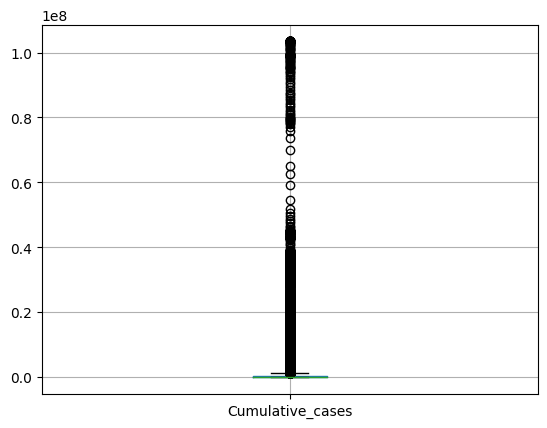

In [19]:
df_covid_limpio.boxplot(['Cumulative_cases'])

<Axes: >

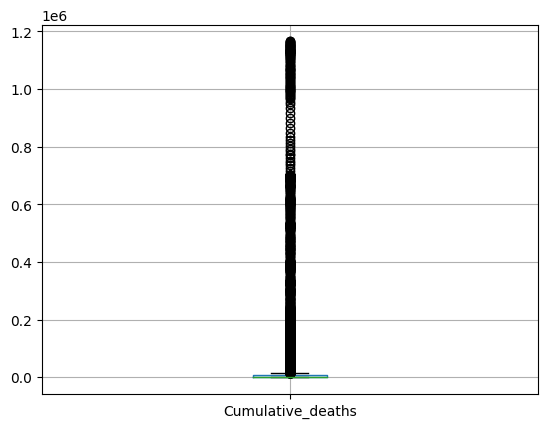

In [20]:
df_covid_limpio.boxplot(['Cumulative_deaths'])

<Axes: >

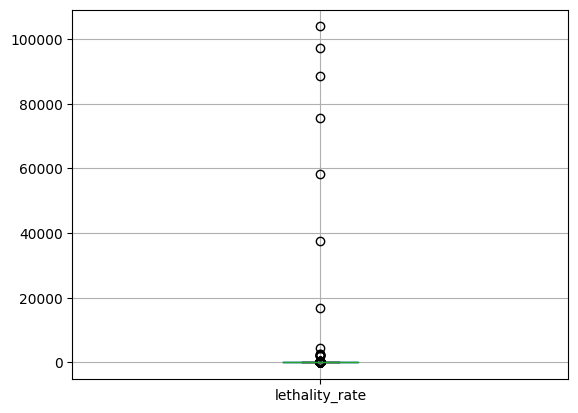

In [21]:
df_covid_limpio.boxplot(['lethality_rate'])

In [22]:
# Calcular los cuantiles 0 y 0.99 para la columna 'lethality_rate'
cuantil_0 = df_covid_limpio['lethality_rate'].quantile(0)
cuantil_99 = df_covid_limpio['lethality_rate'].quantile(0.99)

# Filtrar el DataFrame para quedarse con los registros dentro del rango de cuantiles
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= cuantil_0) & (df_covid_limpio['lethality_rate'] <= cuantil_99)]
# reeemplazar nombres de paises excesivamente largos
df_covid_limpio["Country"] = df_covid_limpio["Country"].replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")
df_covid_limpio["Country"] = df_covid_limpio["Country"].replace("United States of America", "USA")
# Mostrar las primeras filas del DataFrame filtrado
df_covid_limpio.tail()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
50875,2023-12-24,ZW,Zimbabwe,23,266048,1,5731,2.15
50876,2023-12-31,ZW,Zimbabwe,23,266071,0,5731,2.15
50877,2024-01-07,ZW,Zimbabwe,46,266117,3,5734,2.15
50878,2024-01-14,ZW,Zimbabwe,85,266202,3,5737,2.16
50879,2024-01-21,ZW,Zimbabwe,55,266257,0,5737,2.15


In [23]:
print(df_covid_limpio[df_covid_limpio["Country"] == "England"])


Empty DataFrame
Columns: [Date_reported, Country_code, Country, New_cases, Cumulative_cases, New_deaths, Cumulative_deaths, lethality_rate]
Index: []


<Axes: >

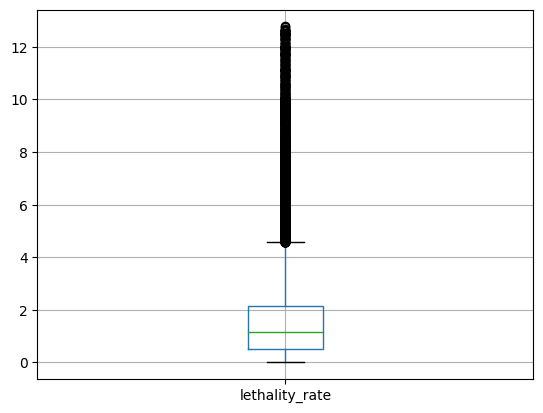

In [24]:
df_covid_limpio.boxplot(['lethality_rate'])

In [25]:
df_covid_limpio.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,"44,853.00","44,853.00","44,853.00","44,853.00","44,853.00"
mean,"17,221.28","1,809,405.95",151.15,"21,146.09",1.60
std,"252,678.18","7,614,160.89",905.89,"82,760.44",1.67
min,"-65,079.00",1.00,"-3,432.00",0.00,0.00
25%,5.00,"8,173.00",0.00,73.00,0.50
50%,172.00,"63,993.00",1.00,803.00,1.16
75%,"2,624.00","626,334.00",26.00,"7,975.00",2.13
max,"40,475,477.00","103,436,829.00","47,687.00","1,165,780.00",12.78


In [26]:
# Reiniciar el índice del DataFrame final
df_covid_limpio = df_covid_limpio.reset_index(drop=True)

# Mostrar las primeras filas del DataFrame limpio con el índice reiniciado
df_covid_limpio.tail()


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
44848,2023-12-24,ZW,Zimbabwe,23,266048,1,5731,2.15
44849,2023-12-31,ZW,Zimbabwe,23,266071,0,5731,2.15
44850,2024-01-07,ZW,Zimbabwe,46,266117,3,5734,2.15
44851,2024-01-14,ZW,Zimbabwe,85,266202,3,5737,2.16
44852,2024-01-21,ZW,Zimbabwe,55,266257,0,5737,2.15


# EDA Base Population United Nations

In [27]:
import pandas as pd

# Seleccionar solo las columnas deseadas
columnas_deseadas_population = ['ISO2 Alpha-code', 'Total Population, as of 1 July (thousands)', 'Male Population, as of 1 July (thousands)',
                                'Female Population, as of 1 July (thousands)', 'Population Density, as of 1 July (persons per square km)',
                                'Life Expectancy at Birth, both sexes (years)','Year', 'Location code','Region, subregion, country or area *','Parent code']
df_population_limpio = df_population[columnas_deseadas_population]

# Mostrar las primeras filas del DataFrame limpio
df_population_limpio.head(10)


,ISO2 Alpha-code,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Life Expectancy at Birth, both sexes (years)",Year,Location code,"Region, subregion, country or area *",Parent code
69,NaN,"7,764,951.03","3,906,407.85","3,858,543.18",59.55,72.79,"2,019.00",900,WORLD,0
142,NaN,"1,080,677.35","538,158.39","542,518.96",49.42,60.73,"2,019.00",1834,Sub-Saharan Africa,1828
214,NaN,"530,149.56","273,104.23","257,045.33",42.48,73.39,"2,019.00",1833,Northern Africa and Western Asia,1828
286,NaN,"2,021,559.65","1,033,583.86","987,975.79",195.68,70.61,"2,019.00",1831,Central and Southern Asia,1828
358,NaN,"2,324,282.00","1,176,368.32","1,147,913.68",143.12,77.01,"2,019.00",1832,Eastern and South-Eastern Asia,1828
430,NaN,"646,846.76","318,988.77","327,857.99",31.92,75.06,"2,019.00",1830,Latin America and the Caribbean,1828
502,NaN,"12,961.95","6,662.35","6,299.60",23.94,67.34,"2,019.00",1835,Oceania (excluding Australia and New Zealand),1828
574,NaN,"30,316.20","15,030.65","15,285.55",3.81,83.02,"2,019.00",1836,Australia/New Zealand,1828
646,NaN,"1,118,157.57","544,511.28","573,646.28",27.45,79.16,"2,019.00",1829,Europe and Northern America,1828
719,NaN,"1,274,265.45","620,700.60","653,564.84",25.97,79.81,"2,019.00",901,More developed regions,1803


In [28]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 10 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ISO2 Alpha-code                                           236 non-null    object 
 1   Total Population, as of 1 July (thousands)                286 non-null    object 
 2   Male Population, as of 1 July (thousands)                 286 non-null    object 
 3   Female Population, as of 1 July (thousands)               286 non-null    object 
 4   Population Density, as of 1 July (persons per square km)  286 non-null    object 
 5   Life Expectancy at Birth, both sexes (years)              286 non-null    object 
 6   Year                                                      286 non-null    float64
 7   Location code                                             286 non-null    int64  
 8   Region, subregion

In [29]:
# Renombrar las columnas del DataFrame limpio
df_population_limpio = df_population_limpio.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy',
    'Year':'year'
})

# Mostrar las primeras filas del DataFrame limpio con las columnas renombradas
df_population_limpio.head()


,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy,year,Location code,"Region, subregion, country or area *",Parent code
69,NaN,"7,764,951.03","3,906,407.85","3,858,543.18",59.55,72.79,"2,019.00",900,WORLD,0
142,NaN,"1,080,677.35","538,158.39","542,518.96",49.42,60.73,"2,019.00",1834,Sub-Saharan Africa,1828
214,NaN,"530,149.56","273,104.23","257,045.33",42.48,73.39,"2,019.00",1833,Northern Africa and Western Asia,1828
286,NaN,"2,021,559.65","1,033,583.86","987,975.79",195.68,70.61,"2,019.00",1831,Central and Southern Asia,1828
358,NaN,"2,324,282.00","1,176,368.32","1,147,913.68",143.12,77.01,"2,019.00",1832,Eastern and South-Eastern Asia,1828


In [30]:
# Convertir la columna 'year' al formato de fecha
df_population_limpio['year'] = pd.to_datetime(df_population_limpio['year'], format='%Y')

# Verificar el cambio
df_population_limpio.head()


,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy,year,Location code,"Region, subregion, country or area *",Parent code
69,NaN,"7,764,951.03","3,906,407.85","3,858,543.18",59.55,72.79,2019-01-01,900,WORLD,0
142,NaN,"1,080,677.35","538,158.39","542,518.96",49.42,60.73,2019-01-01,1834,Sub-Saharan Africa,1828
214,NaN,"530,149.56","273,104.23","257,045.33",42.48,73.39,2019-01-01,1833,Northern Africa and Western Asia,1828
286,NaN,"2,021,559.65","1,033,583.86","987,975.79",195.68,70.61,2019-01-01,1831,Central and Southern Asia,1828
358,NaN,"2,324,282.00","1,176,368.32","1,147,913.68",143.12,77.01,2019-01-01,1832,Eastern and South-Eastern Asia,1828


In [31]:
criterio=df_population_limpio['Male_Population'] == '...'
df_population_limpio[criterio]

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy,year,Location code,"Region, subregion, country or area *",Parent code
12817,VA,0.53,...,...,1200,...,2019-01-01,336,Holy See,925


In [32]:
# Contar valores nulos antes de eliminar
null_antes = df_population_limpio.isnull().sum()

# Eliminar todos los registros nulos del DataFrame limpio
df_population_limpio = df_population_limpio.dropna()

# Contar valores nulos después de eliminar
null_despues = df_population_limpio.isnull().sum()

# Mostrar la cantidad de valores nulos antes y después
print("Cantidad de valores nulos antes de eliminar:")
print(null_antes)

print("\nCantidad de valores nulos después de eliminar:")
print(null_despues)

df_population_limpio.info()

Cantidad de valores nulos antes de eliminar:
Country_code                            50
Total_Population                         0
Male_Population                          0
Female_Population                        0
Population_Density                       0
Life_Expectancy                          0
year                                     0
Location code                            0
Region, subregion, country or area *     0
Parent code                              0
dtype: int64

Cantidad de valores nulos después de eliminar:
Country_code                            0
Total_Population                        0
Male_Population                         0
Female_Population                       0
Population_Density                      0
Life_Expectancy                         0
year                                    0
Location code                           0
Region, subregion, country or area *    0
Parent code                             0
dtype: int64
<class 'pandas.core.frame.DataF

In [33]:
# Convertir las columnas al formato int64
columnas_numericas = ['Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
# Convertir las columnas a números utilizando pd.to_numeric
#El parámetro errors='coerce' indica que si hay algún error durante la conversión,
# se debe establecer el valor en NaN en lugar de generar una excepción.
df_population_limpio[columnas_numericas] = df_population_limpio[columnas_numericas].apply(pd.to_numeric, errors='coerce')
df_population_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1801 to 20593
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Country_code                          236 non-null    object        
 1   Total_Population                      236 non-null    float64       
 2   Male_Population                       235 non-null    float64       
 3   Female_Population                     235 non-null    float64       
 4   Population_Density                    236 non-null    float64       
 5   Life_Expectancy                       235 non-null    float64       
 6   year                                  236 non-null    datetime64[ns]
 7   Location code                         236 non-null    int64         
 8   Region, subregion, country or area *  236 non-null    object        
 9   Parent code                           236 non-null    int64         
dt

In [34]:
# Contar valores nulos antes de eliminar
null_antes = df_population_limpio.isnull().sum()

# Eliminar todos los registros nulos del DataFrame limpio
df_population_limpio = df_population_limpio.dropna()

# Contar valores nulos después de eliminar
null_despues = df_population_limpio.isnull().sum()

# Mostrar la cantidad de valores nulos antes y después
print("Cantidad de valores nulos antes de eliminar:")
print(null_antes)

print("\nCantidad de valores nulos después de eliminar:")
print(null_despues)

df_population_limpio.info()

Cantidad de valores nulos antes de eliminar:
Country_code                            0
Total_Population                        0
Male_Population                         1
Female_Population                       1
Population_Density                      0
Life_Expectancy                         1
year                                    0
Location code                           0
Region, subregion, country or area *    0
Parent code                             0
dtype: int64

Cantidad de valores nulos después de eliminar:
Country_code                            0
Total_Population                        0
Male_Population                         0
Female_Population                       0
Population_Density                      0
Life_Expectancy                         0
year                                    0
Location code                           0
Region, subregion, country or area *    0
Parent code                             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int

In [35]:
df_population_limpio.describe()

,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy,Location code,Parent code
count,235.00,235.00,235.00,235.00,235.00,235.00,235.00
mean,"33,031.93","16,617.98","16,413.95",459.05,73.49,440.40,"1,193.78"
std,"134,487.72","68,891.30","65,609.33","2,222.15",7.36,253.08,"1,086.37"
min,1.75,0.88,0.87,0.14,52.91,4.00,905.00
25%,400.02,194.84,211.00,38.73,68.52,224.00,914.00
50%,"5,453.92","2,738.22","2,767.84",95.24,75.06,440.00,922.00
75%,"20,759.53","10,409.42","10,350.11",239.94,79.10,659.50,926.00
max,"1,421,864.03","726,781.91","695,082.12","24,855.03",86.54,894.00,"5,501.00"


In [36]:
# Multiplicar por 1000 las columnas 'Total_Population', 'Male_Population', 'Female_Population'
columnas_a_multiplicar = ['Total_Population', 'Male_Population', 'Female_Population']
df_population_limpio[columnas_a_multiplicar] = df_population_limpio[columnas_a_multiplicar] * 1000

# Mostrar las primeras filas del DataFrame con las columnas actualizadas
df_population_limpio.head()


,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy,year,Location code,"Region, subregion, country or area *",Parent code
1801,BI,"11,874,838.00","5,894,278.00","5,980,560.00",457.61,62.35,2019-01-01,108,Burundi,910
1873,KM,"790,986.00","397,126.00","393,860.00",425.03,64.07,2019-01-01,174,Comoros,910
1945,DJ,"1,073,994.00","533,626.00","540,367.00",46.33,63.09,2019-01-01,262,Djibouti,910
2017,ER,"3,498,818.00","1,724,860.00","1,773,958.00",28.88,67.30,2019-01-01,232,Eritrea,910
2089,ET,"114,120,594.00","57,375,433.00","56,745,161.00",114.12,65.84,2019-01-01,231,Ethiopia,910


In [37]:
# Reiniciar el índice del DataFrame final
df_population_limpio = df_population_limpio.reset_index(drop=True)

# Mostrar las primeras filas del DataFrame limpio con el índice reiniciado
df_population_limpio.head()


,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy,year,Location code,"Region, subregion, country or area *",Parent code
0,BI,"11,874,838.00","5,894,278.00","5,980,560.00",457.61,62.35,2019-01-01,108,Burundi,910
1,KM,"790,986.00","397,126.00","393,860.00",425.03,64.07,2019-01-01,174,Comoros,910
2,DJ,"1,073,994.00","533,626.00","540,367.00",46.33,63.09,2019-01-01,262,Djibouti,910
3,ER,"3,498,818.00","1,724,860.00","1,773,958.00",28.88,67.30,2019-01-01,232,Eritrea,910
4,ET,"114,120,594.00","57,375,433.00","56,745,161.00",114.12,65.84,2019-01-01,231,Ethiopia,910


# Pregunta 1 - Worldwide Cases Distribution

In [38]:
# @title Distribución de casos mundiales
# Agrupar los datos por país y encontrar el máximo valor de casos acumulados para cada país
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)

# Seleccionar los 10 países con el mayor número de casos acumulados
top_10_paises = total_por_pais.nlargest(10)

# Calcular la suma de los casos acumulados de los países que no están en el top 10
otros = total_por_pais.drop(top_10_paises.index).sum()

# Agregar la suma de los casos de 'Otros' al DataFrame de los top 10 países
top_10_paises['Otros'] = otros

# Mostrar el DataFrame resultante que contiene los top 10 países y la categoría 'Otros'
top_10_paises


Country
USA                  103436829
China                 99326423
India                 45023751
France                38997490
Germany               38437756
Brazil                37519960
Republic of Korea     34571873
Japan                 33803572
Italy                 26693706
United Kingdom        24885790
Otros                291519855
Name: Cumulative_cases, dtype: int64

In [39]:
# @title Progresión de los casos por país
# Agrupar los datos por país y encontrar el máximo valor de casos acumulados para cada país
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)

# Seleccionar los 5 países con el mayor número de casos acumulados
# nlargest() devuelve los primeros 5 elementos con los valores más grandes
top_5_paises = total_por_pais.nlargest(5)

# Restablecer el índice del DataFrame para facilitar el filtrado por índice
df_covid_limpio_reset = df_covid_limpio.reset_index()

# Filtrar el DataFrame original para seleccionar solo las filas correspondientes a los 5 países principales
df_top_5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises.index)]

# Crear una tabla pivote con los casos acumulados para los 5 países principales en función de la fecha
# Esto crea un DataFrame donde las filas son los países, las columnas son las fechas y los valores son los casos acumulados
# Cualquier valor faltante se rellena con 0
total_acumulado_top_5 = df_top_5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)

# Mostrar el DataFrame resultante que contiene los casos acumulados para los 5 países principales a lo largo del tiempo
total_acumulado_top_5


Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
China,1.00,45.00,125.00,"1,985.00","14,411.00","37,251.00","68,584.00","77,042.00","79,968.00","80,859.00",...,"99,320,035.00","99,320,425.00","99,320,845.00","99,321,242.00","99,321,637.00","99,322,142.00","99,322,727.00","99,323,756.00","99,325,108.00","99,326,423.00"
France,0.00,0.00,0.00,3.00,6.00,12.00,12.00,16.00,16.00,16.00,...,"38,997,490.00","38,997,490.00","38,997,490.00","38,997,490.00","38,997,490.00","38,997,490.00","38,997,490.00","38,997,490.00","38,997,490.00","38,997,490.00"
Germany,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,170.00,"1,075.00",...,"38,437,756.00","38,437,756.00","38,437,756.00","38,437,756.00","38,437,756.00","38,437,756.00","38,437,756.00","38,437,756.00","38,437,756.00","38,437,756.00"
India,0.00,0.00,0.00,0.00,2.00,7.00,7.00,7.00,7.00,39.00,...,"45,001,575.00","45,001,764.00","45,002,179.00","45,003,055.00","45,004,816.00","45,008,620.00","45,013,172.00","45,018,134.00","45,021,758.00","45,023,751.00"
USA,0.00,0.00,0.00,7.00,9.00,20.00,24.00,40.00,73.00,464.00,...,"103,436,829.00","103,436,829.00","103,436,829.00","103,436,829.00","103,436,829.00","103,436,829.00","103,436,829.00","103,436,829.00","103,436,829.00","103,436,829.00"


NameError: name 'total_acumulado_spain_italy' is not defined

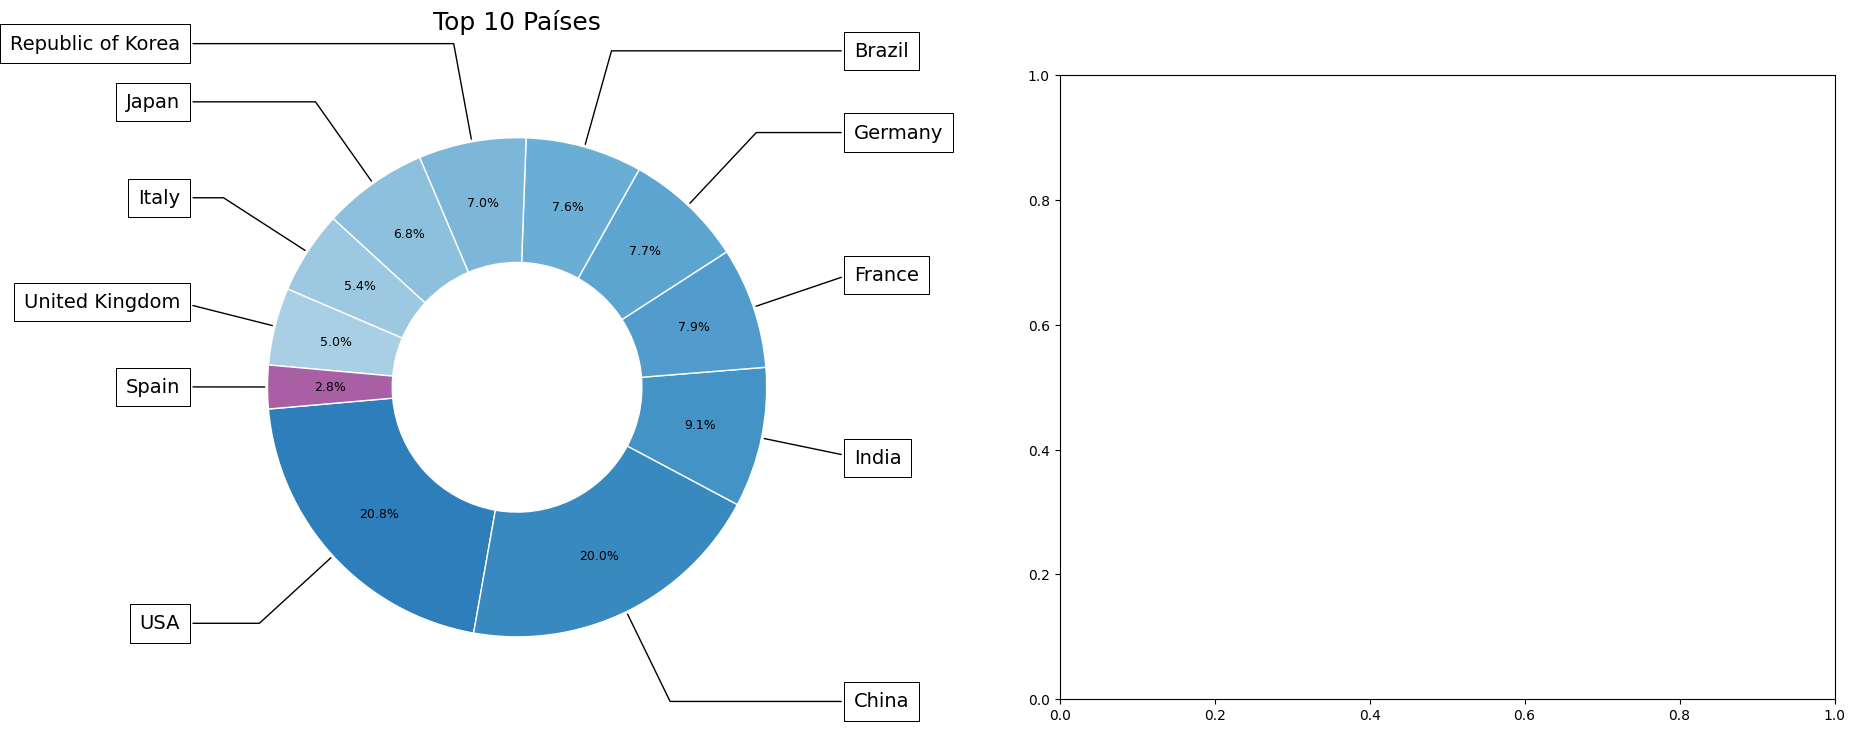

In [40]:
# @title Gráfico de top 10 países con progresión de España e Italia

import matplotlib.pyplot as plt
import numpy as np

# Asumo que df_covid_limpio contiene los datos actualizados
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
top_10_paises = total_por_pais.nlargest(10)

# Incluyendo a España
top_10_paises['Spain'] = total_por_pais.loc['Spain']

# Crear una paleta de colores azules que varíe en intensidad
colores_azules = plt.cm.Blues(np.linspace(0.7, 0.3, len(top_10_paises)))
# Sustituir el color para España
colores_azules[top_10_paises.index.get_loc('Spain')] = [0.6627, 0.3725, 0.6392, 1]

fig, axs = plt.subplots(1, 2, figsize=(22, 6))
# Ajuste del top margin
plt.subplots_adjust(top=1.15)

# Primer Subplot - Gráfico de Donut
wedges, texts, autotexts = axs[0].pie(top_10_paises, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=0.75, colors=colores_azules, startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))

# Añadir nombres de los países fuera del donut y porcentajes dentro del donut
for i, (autotext, text, wedge) in enumerate(zip(autotexts, texts, wedges)):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={angle}"
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.72), zorder=0, va="center")
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axs[0].annotate(top_10_paises.index[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, fontsize=14, **kw)

axs[0].set_title('Top 10 Países', fontsize="18", y=1.06)  # Añadir título al primer subplot

# Segundo Subplot - Gráfico de Líneas para la progresión de España e Italia
for country in ['Spain', 'Italy']:
    color = '#A95FA3' if country == 'Spain' else None
    days_since_start = (total_acumulado_spain_italy.columns - total_acumulado_spain_italy.columns[0]).days
    axs[1].plot(days_since_start, total_acumulado_spain_italy.loc[country], label=country, color=color)

# Añadir un recuadro alrededor de cada label en el segundo subplot
for label in axs[1].get_xticklabels():
    label.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Añadir leyenda al gráfico de líneas
axs[1].legend()
axs[1].set_title('Progresión de Casos por País', y=1.04, fontsize="18")  # Añadir título al segundo subplot

# Mostrar el gráfico
plt.show()


In [ ]:
# @title Progresión de casos acumulados para España e Italia

import matplotlib.pyplot as plt

# Filtrar el DataFrame original para seleccionar solo las filas correspondientes a España e Italia
df_spain_italy = df_covid_limpio[df_covid_limpio['Country'].isin(['Spain', 'Italy'])]

# Crear una tabla pivote con los casos acumulados para España e Italia en función de la fecha
total_acumulado_spain_italy = df_spain_italy.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)

# Gráfico de líneas para la progresión de casos acumulados
fig, ax = plt.subplots(figsize=(12, 6))

for country in ['Spain', 'Italy']:
    days_since_start = (total_acumulado_spain_italy.columns - total_acumulado_spain_italy.columns[0]).days
    ax.plot(days_since_start, total_acumulado_spain_italy.loc[country], label=country)

# Añadir leyenda al gráfico de líneas
ax.legend()
ax.set_title('Progresión de Casos Acumulados para España e Italia', fontsize=18)
ax.set_xlabel('Días desde el primer reporte', fontsize=14)
ax.set_ylabel('Casos Acumulados', fontsize=14)
plt.show()


# Pregunta 2 - Daily New Cases (Spain)

In [ ]:
# @title Selección de país (Utilízese el selector para cambiar de España a cualquier otro de la lista)
import ipywidgets as widgets
from IPython.display import display

# Le damos valor inicial a la variable
selected_country ='Spain'
code_country = 'ES'

# Obtener la lista de países únicos
paises_disponibles = df_covid_limpio['Country'].unique()

# Crear el widget de selección
country_dropdown = widgets.Dropdown(
    options=paises_disponibles,
    description='Seleccione un país:',
    disabled=False,
)

# Función para manejar la selección del usuario
def handle_country_selection(change):
    global selected_country, code_country
    selected_country = change.new
    print("País seleccionado:", selected_country)
    # Obtener el código del país seleccionado
    code_country = df_covid_limpio[df_covid_limpio['Country'] == selected_country]['Country_code'].iloc[0]
    print("Código seleccionado:", code_country)

# Registrar la función de manejo de eventos
country_dropdown.observe(handle_country_selection, names='value')
# Mostrar el widget de selección
display(country_dropdown)





In [ ]:
# @title Nuevos casos
# Declarar que grouped_df y new_cases son variables globales
global grouped_df, new_cases
# Agrupar los datos de COVID-19 por país y fecha de informe, y sumar los casos acumulativos para cada fecha
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()
# Reiniciar el índice del DataFrame, convirtiendo el índice actual (países) en una columna y asignando un nuevo índice numérico
grouped_df = grouped_df.reset_index()
# Establecer la columna 'Country' como el nuevo índice del DataFrame, reemplazando el índice numérico
grouped_df = grouped_df.set_index('Country')
# Seleccionar solo la fila correspondiente al país seleccionado, reduciendo el DataFrame para contener solo los datos de ese país
grouped_df = grouped_df.loc[[selected_country]]
# Obtener las fechas (columnas) del DataFrame resultante después de seleccionar el país
fechas = grouped_df.columns
# Calcular los nuevos casos restando el número de casos acumulativos de un día al siguiente día.
# Cualquier valor faltante se llena con el valor del día actual.
# Luego, se suman los nuevos casos para cada fecha.
new_cases = grouped_df[fechas].diff(axis=1).fillna(grouped_df[fechas]).sum(axis=0)
# Filtrar los nuevos casos para mantener solo aquellos que son mayores que cero,
# es decir, descartar las fechas en las que no hubo nuevos casos.
new_cases = new_cases[new_cases > 0]
# Imprimir un mensaje para indicar que el cálculo de los nuevos casos ha finalizado
# print("Nuevos casos calculados.")

# Registrar la función de manejo de eventos
#country_dropdown.observe(handle_country_selection, names='value')
# Mostrar el widget de selección
#display(country_dropdown)

In [ ]:
# @title Gráfico nuevos casos
# Colores
green_color = '#10420B'
red_color = '#6F0105'
gray_color = '#333333'
blue_color = '#004261'
purple_color = '#512A4E'
# Encontrar el valor más alto y más bajo
max_date = new_cases.idxmax()
max_value = new_cases.max()
min_date = new_cases.idxmin()
min_value = new_cases.min()
# Obtener el texto formateado
max_date_text = max_date.strftime('%b %Y')
min_date_text = min_date.strftime('%b %Y')
# Crear la figura y los ejes con un esquema de color agradable
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2, gridspec_kw={'width_ratios': [3, 1]})
# Configurar el fondo del gráfico como blanco y activar la cuadrícula con líneas grises
ax1.set_facecolor('white')
# Cambiar el color de la cuadrícula a gris claro
ax1.grid(axis='y', color='lightgray', linestyle="--")
# Desactivar el fondo del gráfico
ax1.set_frame_on(False)
# Grafico de barras en la columna izquierda con apariencia de histograma
bars = ax1.bar(new_cases.index, new_cases.values/1e6, color='gray', edgecolor=blue_color, alpha=0.85, width=15)
ax1.set_xlabel('Fecha', fontsize=12, color='dimgray')
ax1.set_ylabel('Millones', fontsize=12, color='dimgray')
# OBTENER SOLO EL NOMBRE DEL PAIS
country_name = grouped_df.index[0].split('[')[0].strip()
# Colocar el título e con el nombre del país
ax1.annotate(f'Nuevos Casos Diarios en:\n\n', xy=(0, 1), xycoords='axes fraction', xytext=(700, -30), textcoords='offset points', ha='left', va='top', fontsize=14, color='#272E24')
ax1.annotate(f'{country_name}\n', xy=(0, 1), xycoords='axes fraction', xytext=(700, -60), textcoords='offset points', ha='left', va='top', fontsize=14, color=purple_color,fontweight='bold')
ax1.annotate(f"El análisis de nuevos", xy=(0, 1), xycoords='axes fraction', xytext=(700, -90), textcoords='offset points', ha='left', va='top', fontsize=14, color='#272E24')
ax1.annotate(f"casos confirmados", xy=(0, 1), xycoords='axes fraction', xytext=(700, -120), textcoords='offset points', ha='left', va='top', fontsize=14, color='#272E24')
ax1.annotate(f"revela su pico máximo en:", xy=(0, 1), xycoords='axes fraction', xytext=(700, -150), textcoords='offset points', ha='left', va='top', fontsize=14, color='#272E24')
ax1.annotate(f"{max_date_text}", xy=(0, 1), xycoords='axes fraction', xytext=(700, -180), textcoords='offset points', ha='left', va='top', fontsize=14, color=red_color,fontweight='bold')
# Formatear el eje x con el formato de mes
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Resaltar meses cambiando el color del texto
for label in ax1.xaxis.get_majorticklabels():
    if label.get_text() == max_date.strftime('%b %Y'):
        label.set_color(red_color)  # Cambiar a rojo para max_date
        label.set_fontweight('bold')
        ax1.bar(max_date, max_value/1e6, color=red_color, edgecolor=red_color, alpha=0.85, width=20)
# Resaltar la barra roja ajustando su altura
for bar in bars:
    if bar.get_height() == max_value/1e6:
        bar.set_color(red_color)  # Cambiar el color de la barra máxima a rojo
# Rotar las etiquetas de las fechas en la columna izquierda
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# Calcular la posición vertical de la parte superior de la barra
bar_height = max(bars.get_height() for bars in bars)
text_height = max_value/1e6 + bar_height * 0.02  # Ajustar la posición vertical
# Declarar y colocar texto encima de las barras
max_text = ax1.text(max_date, text_height, f"{max_value/1e6:.2f} Mill", ha='center', fontsize=12, color=red_color)
# Crear un rectángulo en el subplot de la derecha
rect = patches.Rectangle((0, 0), 0, 1, linewidth=1, edgecolor='#4C7040', facecolor='none')
ax2.add_patch(rect)
ax2.axis('off')
# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(wspace=0.05)
# Mostrar el gráfico
plt.show()

# Pregunta 3 - Lethality Rate by Country

In [ ]:
# @title Letalidad
#global result_final
# Definición de una función para obtener la fila con el valor máximo de una columna dentro de un grupo
def get_max_row(group, column):
    # Retorna la fila con el valor máximo en la columna especificada dentro del grupo
    return group.loc[group[column].idxmax()]
# Agrupación de los datos por país y mes, y cálculo de la fila con la tasa de letalidad máxima para cada grupo
result = df_covid_limpio.groupby(['Country', df_covid_limpio['Date_reported'].dt.to_period("M")]).apply(lambda group: get_max_row(group, 'lethality_rate'))
# Restablecimiento del índice para eliminar el índice jerárquico generado por la agrupación
result.reset_index(drop=True, inplace=True)
# Selección de los cuatro países con la tasa de letalidad media más alta
top_4_paises = result.groupby('Country')['lethality_rate'].mean().nlargest(4).index
# Filtrado de los datos para incluir solo los países seleccionados anteriormente
result = result[result['Country'].isin(top_4_paises)]
# Obtención de los datos de la tasa de letalidad máxima por mes para un país específico (en este caso, el que este seleccionado en el widget mas atras definido)
result_pais = df_covid_limpio[df_covid_limpio['Country'] == selected_country].groupby(df_covid_limpio['Date_reported'].dt.to_period("M")).apply(lambda group: get_max_row(group, 'lethality_rate'))
# Restablecimiento del índice para eliminar el índice jerárquico generado por la agrupación
result_pais.reset_index(drop=True, inplace=True)
# Concatenación de los resultados de los cuatro países seleccionados y el país específico (Francia)
result_final = pd.concat([result, result_pais])
# Impresión de los nombres de los cuatro países con la tasa de letalidad media más alta
#print(top_4_paises)

In [ ]:
# @title Gráfico letalidad

# Itera sobre los países únicos en el DataFrame
for pais in result_final['Country'].unique():
    country_data = result_final[result_final['Country'] == pais]
# Filtra los datos para Francia a partir del 20 de abril
pais_data = result_final[(result_final['Country'] == selected_country) & (result_final['Date_reported'] >= '2021-04-20')]
# Encuentra el número total de muertes acumuladas
total_deaths = pais_data['Cumulative_deaths'].iloc[-1]
# Calcula la tasa de letalidad
lethality_rate = (total_deaths / pais_data['Cumulative_cases'].iloc[-1]) * 100
# Función para formatear los números en porcentaje con el símbolo %
def to_percentage_with_symbol(y, pos):
    return f'{y:.0f}%'
# Crea el gráfico de líneas y el subplot para el texto
fig, (ax1, ax2) = plt.subplots(figsize=(14, 5), ncols=2, gridspec_kw={'width_ratios': [3, 1]})
# Configura el fondo del gráfico como blanco y activa la cuadrícula con líneas grises
ax1.set_facecolor('white')
ax1.grid(axis='y', color='lightgray')  # Cambia el color de la cuadrícula a gris claro
ax1.set_frame_on(False)  # Desactiva el fondo del gráfico
# Ajusta el estilo de la primera línea horizontal del grid para que sea más prominente
ax1.yaxis.get_gridlines()[1].set_linewidth(5)  # Ajusta el ancho de la línea si es necesario
# Itera sobre los países únicos en el DataFrame
for pais in result_final['Country'].unique():
    country_data = result_final[result_final['Country'] == pais]
    # Grafica los datos del país, ajustando el estilo de línea para el país seleccionado
    if pais == selected_country:
        line, = ax1.plot(country_data['Date_reported'], country_data['lethality_rate'], label=pais, linestyle='--', color = '#512A4E')  # Línea discontinua para el país seleccionado
    else:
        line, = ax1.plot(country_data['Date_reported'], country_data['lethality_rate'], label=pais)
    # Resalta el país con el máximo valor de letalidad
    if pais == result_final['Country'].iloc[-1]:  # Resalta el último país seleccionado en el bucle
        max_lethality_country = pais
        max_lethality_date = country_data.loc[country_data['lethality_rate'].idxmax(), 'Date_reported']
        # Calcula la posición de la flecha
        max_lethality_rate = country_data['lethality_rate'].max()
        arrow_position = (max_lethality_date, max_lethality_rate)
        ax1.annotate(f'Max: {max_lethality_country}', xy=arrow_position,
                    xytext=(80, 20), textcoords='offset points', ha='center', fontsize=14, color='#403F40', fontweight="bold",
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#403F40'))
# Formatea los valores del eje y en porcentaje con el símbolo %
ax1.yaxis.set_major_formatter(FuncFormatter(to_percentage_with_symbol))
# Crea una leyenda personalizada para el segundo subplot
legend_handles = []
for handle in ax1.get_legend_handles_labels()[0]:
    legend_handles.append(ax2.plot([], [], color=handle.get_color(), label=handle.get_label())[0])
# Agrega la leyenda personalizada al segundo subplot y ajusta el tamaño del texto de la leyenda
ax2.legend(handles=legend_handles, loc='upper center', frameon=True, fontsize=12)  # Ajusta el tamaño del texto de la leyenda
# Muestra el texto en el subplot de la derecha
ax2.text(0, 0, f"Desde el 20 de abril de 2020:", ha='center', va='center', fontsize=14, color='#2F232E')  # Ajusta el tamaño del texto y lo mueve más abajo
ax2.text(0, -0.008, f"{pais}", ha='center', va='center', fontsize=14, color='#512A4E', fontweight="bold")  # Ajusta el tamaño del texto y lo mueve más abajo
ax2.text(-0.013, -0.016, f"ha reportado más de:", ha='center', va='center', fontsize=14, color='#2F232E')  # Ajusta el tamaño del texto y lo mueve más abajo
ax2.text(0.039, -0.016, '{:,.0f}'.format(total_deaths), ha='center', va='center', fontsize=14, color='#512A4E', fontweight="bold")
ax2.text(-0.012, -0.024, f"muertes del Covid 19.", ha='center', va='center', fontsize=14, color='#2F232E')  # Ajusta el tamaño del texto y lo mueve más abajo
ax2.text(-0.019, -0.032, f"Ratio de letalidad:", ha='center', va='center', fontsize=14, color='#2F232E')  # Ajusta el tamaño del texto y lo mueve más abajo
ax2.text(0.025, -0.032, f"{lethality_rate:.1f}%", ha='center', va='center', fontsize=14, color='#512A4E', fontweight="bold")  # Ajusta el tamaño del texto y lo mueve más abajo
# Desactiva los ejes en el subplot de la derecha
ax2.axis('off')
# Ajusta el espacio entre los subplots
plt.tight_layout()
# Muestra los gráficos
plt.show()


# Pregunta 4 - Most relevant demographic characteristics

In [ ]:
# @title Características mas relevantes de la población mundial
# Seleccionar registros hasta '2020-12-31'
df_filtrado = df_covid_limpio.loc[:'2020-12-31']

# Seleccionar los registros hasta '2020-12-31' del DataFrame original
df_filtrado = df_covid_limpio[df_covid_limpio['Date_reported'] <= '2020-12-31']

# Agrupar por código de país y país, calculando el índice de letalidad promedio
df_agrupado = df_filtrado.groupby(['Country_code', 'Country'], as_index=False)['lethality_rate'].mean()

# Realizar un inner join con el DataFrame de población usando el código de país
df_final = pd.merge(df_agrupado, df_population_limpio, on='Country_code', how='inner')

# Seleccionar solo las columnas relevantes para el análisis
columnas_seleccionadas = ['lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
df_final = df_final[columnas_seleccionadas]

# Separar las características (X) y la variable objetivo (y)
X = df_final.drop(['lethality_rate'], axis=1)
y = df_final['lethality_rate']

# Inicializar y entrenar un modelo de Random Forest
model = RandomForestRegressor()
model.fit(X, y)


# Obtener la importancia de las características y ordenarlas de forma descendente
# Calculamos la importancia de las características utilizando el atributo feature_importances_
# del modelo RandomForestRegressor, y luego creamos una Serie de Pandas con estas importancias,
# usando los nombres de las características como índice, y las ordenamos de forma descendente.
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar las características más relevantes
#print("Características demográficas más relevantes:")
#for feature, importance in feature_importances.items():
#    print(f"{feature}: {importance}")


In [ ]:
# @title Gráfico de la población mundial
import matplotlib.pyplot as plt
import seaborn as sns  # Importar seaborn para acceder a las paletas de colores
from matplotlib.ticker import FuncFormatter

# Función para formatear los valores del eje y como porcentajes
def porcentaje_formatter(x, pos):
    return f'{x:.2f}%'

# Crea el gráfico de barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [3, 1]})

# Seleccionar una paleta de colores azules invertida
palette = list(reversed(sns.color_palette("Blues", len(feature_importances))))

# Gráfico de barras de importancia de características con paleta de colores
bars = feature_importances.plot(kind='bar', ax=ax1, color=palette)
ax1.set_title('Características demográficas más relevantes - Covid 19 (Mundial)', fontsize=16, loc="left")
ax1.set_ylabel('Importancia (%)', fontsize=14)  # Agrega el texto para el eje y
ax1.tick_params(axis='x', rotation=45, labelsize=10)  # Rotar el eje x y cambiar el tamaño de los ticks
ax1.grid(False)  # Eliminar el grid de fondo
ax1.set_facecolor('none')  # Establecer el color de fondo como transparente
ax1.yaxis.set_major_formatter(FuncFormatter(porcentaje_formatter))  # Formatear el eje y como porcentaje

# Mostrar la primera línea horizontal y vertical del grid
#ax1.axhline(y=0.001, color='black', linestyle='-', linewidth=0.5)  # Línea horizontal en y=0
ax1.axvline(x=-0.5, color='black', linestyle='-', linewidth=0.5)  # Línea vertical en x=0

# Hallar la esperanza de vida y la densidad de población
esperanza_vida = feature_importances.loc['Life_Expectancy']*100
densidad_poblacion = feature_importances.loc['Population_Density']*100

# Texto en el subplot de la derecha
ax2.text(0.2, 0.5, f'"Según nuestro análisis de importancia,\n\n la esperanza de vida destaca como\n\n la más influyente con el' , fontsize=16, color = '#222222')
ax2.text(1.48, 0.515, f'{esperanza_vida:.2f}%', horizontalalignment='center', verticalalignment='center', fontsize=16,  fontweight="bold", color='#005DA0')
ax2.text(0.23, 0.360, f'seguida por la densidad de población',  fontsize=16, color = '#222222')
ax2.text(0.23, 0.230, f'con el',  fontsize=16, color = '#222222')
ax2.text(0.52, 0.230, f'{densidad_poblacion:.2f} %',  fontsize=16, fontweight="bold", color='#005DA0')
ax2.text(0.90, 0.244, f'"',  fontsize=16, color = '#222222')
ax2.axis('off')  # Eliminar ejes del subplot



# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


#  Pregunta 5 - Most important characteristics of the geographic area

In [ ]:
# @title Caracteristicas demográficas del area seleccionada


# Seleccionar los registros hasta '2020-12-31' del DataFrame original
df_filtrado = df_covid_limpio[df_covid_limpio['Date_reported'] <= '2020-12-31']

# Realiza un merge entre 'df_population_limpio' y 'df_covid_limpio' utilizando 'Country_code. "right_on" para que escoga el dataframe de la derecha'
df_merged = pd.merge(df_population_limpio, df_filtrado, left_on='Country_code', right_on='Country_code', how='inner')

# Utiliza el código de país almacenado en la variable 'code_country'
# para obtener el código parent correspondiente
parent_code_selected = df_merged[df_merged['Country_code'] == code_country]['Parent code'].iloc[0]
#print(parent_code_selected)

# Agrupa los países por 'Parent code'
grupos_por_padre = df_population_limpio.groupby('Parent code')


# Filtra el DataFrame para obtener todos los países con el mismo código parent
paises_mismo_parent = df_merged[df_merged['Parent code'] == parent_code_selected]
#paises_mismo_parent.info()
#print(paises_mismo_parent)


# Seleccionar solo las columnas relevantes para el análisis
columnas_seleccionadas = ['lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
paises_mismo_parent = paises_mismo_parent[columnas_seleccionadas]


#----------------------------------------


# Separar las características (X) y la variable objetivo (y)
X = paises_mismo_parent.drop(['lethality_rate'], axis=1)
y = paises_mismo_parent['lethality_rate']

# Inicializar y entrenar un modelo de Random Forest
model = RandomForestRegressor()
model.fit(X, y)


# Obtener la importancia de las características y ordenarlas de forma descendente
# Calculamos la importancia de las características utilizando el atributo feature_importances_
# del modelo RandomForestRegressor, y luego creamos una Serie de Pandas con estas importancias,
# usando los nombres de las características como índice, y las ordenamos de forma descendente.
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)



In [ ]:
# @title Gráfico del area seleccionada
import matplotlib.pyplot as plt
import seaborn as sns  # Importar seaborn para acceder a las paletas de colores
from matplotlib.ticker import FuncFormatter

# Mostrar las características más relevantes
#print("Características demográficas más relevantes:")
#for feature, importance in feature_importance.items():
#    print(f"{feature}: {importance}")

# Filtra df_areas para obtener la subregión y el continente correspondientes al code_country
subregion_continente_info = df_areas[df_areas['ISO-alpha2 Code'] == code_country][['Sub-region Name', 'Region Name']]

# Verifica si se encontró información para el code_country
if not subregion_continente_info.empty:
    subregion = subregion_continente_info['Sub-region Name'].iloc[0]
    continente = subregion_continente_info['Region Name'].iloc[0]

    # Imprime la información
    #print(f"Para el Country code {code_country}:\n"
    #      f"  Subregión actual: {subregion}\n"
    #      f"  Continente actual: {continente}")
else:
    print(f"No se encontró información para el Country code {code_country}.")



# Función para formatear los valores del eje y como porcentajes
def porcentaje_formatter(x, pos):
    return f'{x:.2f}%'

# Crea el gráfico de barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [3, 1]})

# Seleccionar una paleta de colores azules invertida
palette = list(reversed(sns.color_palette("Blues", len(feature_importance))))

# Gráfico de barras de importancia de características con paleta de colores
bars = feature_importance.plot(kind='bar', ax=ax1, color=palette)
ax1.set_title(f'Características regionales más relevantes - Covid 19 (Subregión)', fontsize=16, loc="left")
ax1.set_ylabel('Importancia (%)', fontsize=14)  # Agrega el texto para el eje y
ax1.tick_params(axis='x', rotation=45, labelsize=10)  # Rotar el eje x y cambiar el tamaño de los ticks
ax1.grid(False)  # Eliminar el grid de fondo
ax1.set_facecolor('none')  # Establecer el color de fondo como transparente
ax1.yaxis.set_major_formatter(FuncFormatter(porcentaje_formatter))  # Formatear el eje y como porcentaje

# Mostrar la primera línea horizontal y vertical del grid
#ax1.axhline(y=0.001, color='black', linestyle='-', linewidth=0.5)  # Línea horizontal en y=0
ax1.axvline(x=-0.5, color='black', linestyle='-', linewidth=0.5)  # Línea vertical en x=0

# Hallar la esperanza de vida y la densidad de población
esperanza = feature_importance.loc['Life_Expectancy']*100
densidad = feature_importance.loc['Population_Density']*100
poblacion_masculina = feature_importance.loc['Male_Population']*100
poblacion_femenina = feature_importance.loc['Female_Population']*100
poblacion_total = feature_importance.loc['Total_Population']*100


# Texto en el subplot de la derecha
ax2.axis('off')  # Eliminar ejes del subplot
ax2.text(0.13, 0.770, f'Área de: ',  fontsize=16, color = '#222222')
ax2.text(0.13, 0.650, f'{subregion}',  fontsize=16, color = '#512A4E', fontweight="bold")


# Obtener los dos primeros elementos de importancia
top2_importance = feature_importance.head(2)

# Agregar información de los dos primeros elementos de importancia dinámicamente
for idx, (feature, importance) in enumerate(top2_importance.items()):
    ax2.text(0.13, 0.36, f'Según nuestro análisis de importancia,\n\ndestacamos:' , fontsize=16, color = '#222222')
    ax2.text(0.13, 0.25 - idx * 0.1, f"{idx + 1}. {importance:.2f}% - {feature.replace('_', ' ')}",  fontsize=14, color='#005DA0', fontweight="bold")

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


# Conclusiones finales

###  Podemos ver como el orden de los dos factores mas importantes analizados *(Densidad de población y Esperanza de vida)* para el caso del área geográfica de España son invertidos con relación al gráfico de la población mundial. Podemos observar cierta relevancia, aunque sin ser especialmente drástica; cobra mayor importancia la densidad de población con respecto a la esperanza de vida. Estos son factores demográficos importantes que se ven afectados por la pandemia de COVID-19, y su impacto varia según la región y el país.
